In [1]:
import random
import sys
import math
import numpy
from matplotlib.colors import ListedColormap
import pylab

In [2]:
def classifyKNN (trainData, testData, k, numberOfClasses):

    def EulerDist(a , b):
        return math.sqrt((a[0] - b[0]) ** 2 + ( a[1] - b[1]) ** 2)

    testLabels = []

    for testPoint in testData:
        testDist = [[EulerDist(testPoint, trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]

        stat = [0 for i in range(numberOfClasses)]


        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1

        testLabels.append( sorted( zip( stat, range(numberOfClasses)), reverse=True)[0][1] )

    return testLabels

def showDataOnMesh (nClasses, nItemsInClass, k):
    def generateTestMesh (trainData):
        x_min = min( [trainData[i][0][0] for i in range(len(trainData))] ) - 1.0
        x_max = max( [trainData[i][0][0] for i in range(len(trainData))] ) + 1.0
        y_min = min( [trainData[i][0][1] for i in range(len(trainData))] ) - 1.0
        y_max = max( [trainData[i][0][1] for i in range(len(trainData))] ) + 1.0
        h = 0.05
        testX, testY = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                                   numpy.arange(y_min, y_max, h))
        return [testX, testY]
    trainData      = generateData (nItemsInClass, nClasses)
    testMesh       = generateTestMesh (trainData)
    testMeshLabels = classifyKNN (trainData, zip(testMesh[0].ravel(), testMesh[1].ravel()), k, nClasses)
    classColormap  = ListedColormap(['red', 'green', 'blue'])
    testColormap   = ListedColormap(['orange', 'purple', 'yellow'])
    pylab.pcolormesh(testMesh[0],
                  testMesh[1],
                  numpy.asarray(testMeshLabels).reshape(testMesh[0].shape),
                  cmap=testColormap)
    pylab.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pylab.show()
    
def calculateAccuracy (nClasses, nItemInClass, k, testPercent):
    data = generateData(nItemInClass, nClasses)
    trainData, testDataWithLabels = splitTrainTest(data, testPercent)
    testData = [testDataWithLabels[i][0] for i in range(len(testDataWithLabels))]

    testDataLabels = classifyKNN(trainData, testData, k, nClasses)
    print ("Точность: ", sum([int(testDataLabels[i]==testDataWithLabels[i][1]) for i in range(len(testDataWithLabels))]) / float(len(testDataWithLabels)))
    
def splitTrainTest (data, testPercent) :
    trainData = []
    testData = []

    for row in data:
        if random.random() < testPercent:
            testData.append(row)
        else:
            trainData.append(row)
    return trainData, testData

def generateData (numberOfClassEl, numberOfClasses):

    data = []
    for classNum in range(numberOfClasses):

       centerX = random.random() * 5.0
       centerY = random.random() * 5.0

       for rowNum in range(numberOfClassEl):
           data.append([ [random.gauss(centerX, 0.5), random.gauss(centerY, 0.5)], classNum ])

    return data

def showData (nClasses, nItemInClass):
    trainData = generateData(nClasses, nItemInClass)
    classColormap  = ListedColormap(['red', 'green', 'blue'])
    pylab.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pylab.show()

Точность:  0.8333333333333334


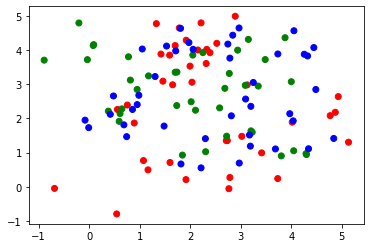

None


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


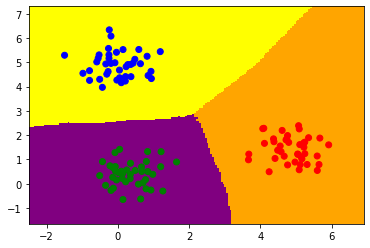

None


In [3]:
nClasses = 3
nItemInClass = 40
testPercent = 0.1
k = 10

data = generateData(40,3)

trainData, testDataWithLabels = splitTrainTest(data, testPercent)
testData = [testDataWithLabels[i][0] for i in range(len(testDataWithLabels))]

calculateAccuracy(nClasses, nItemInClass, k, testPercent)

print(showData(nClasses, nItemInClass))
print(showDataOnMesh(nClasses, nItemInClass, k))